<a href="https://www.kaggle.com/code/josedelano/taller-3-gdd?scriptVersionId=136235231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Taller 3 GDD

## Antes de comenzar ...

#### Cargar datos y realizar las conexiones

In [ ]:
library("tictoc")
library("tidyverse")
library("data.table")
library("dplyr")
library("ggplot2")
library("DBI")
library("RPostgreSQL")
library("RODBC")
library("RPostgres")

In [ ]:
matricula <- fread( input = "/kaggle/input/mineduc/20220719_Matrcula_Ed_Superior_2022_PUBL_MRUN.csv",
                    "encoding" ="UTF-8")

In [ ]:
matricula <- mutate(matricula, cod_sede = paste(cod_inst, cod_sede, sep = "S"))
alumnos <- matricula[, c("mrun",             # cod único alumno
                         "gen_alu",          # sexo: (1 -> hombre, 0 -> mujer)
                         "fec_nac_alu")]     # fecha de nacimiento: AAAAMM

cursa <- matricula[, c("mrun",               # llave foranea.
                       "codigo_unico",       # id unico.
                       "cat_periodo",        # año matricula (2022 todos los datos).
                       "anio_ing_carr_ori",  # año de ingreso primer año.
                       "sem_ing_carr_ori",   # semestre (1 o 2) de ingreso primer año.
                       "anio_ing_carr_act",  # año ingreso a la carrera.
                       "sem_ing_carr_act",   # semestre (1 o 2) de a la carrera.
                       "forma_ingreso")]     # forma ingreso a la carrera

carrera <- matricula[, c("codigo_unico",
                         "cod_carrera", 
                         "nomb_carrera", 
                         "modalidad", 
                         "jornada", 
                         "dur_estudio_carr",    # duración de la carrera (número de semestres). Es un promedio, sin incluir titulación. 
                         "dur_proceso_tit",     # duración proceso de titulación
                         "dur_total_carr",      # duración total teórica del programa
                         "nivel_global",        # pregrado / postgrado / postítulo
                         "nivel_carrera_1",
                         "nivel_carrera_2",
                         "requisito_ingreso", 
                         "vigencia_carrera",
                         "valor_matricula",
                         "valor_arancel",
                         "codigo_demre",
                         "area_conocimiento",
                         "area_carrera_generica",
                         "acreditada_carr" )]      # "NO ACREDITADA" "ACREDITADA"

se_imparte <-matricula[, c("codigo_unico", "cod_sede")]

sede <- matricula[,c( "cod_sede",
                      "nomb_sede",
                      "region_sede",
                      "provincia_sede",
                      "comuna_sede")]

pertenece_a <- matricula[, c("cod_sede",
                             "cod_inst")]

IES <- matricula[, c("cod_inst",
                     "tipo_inst_1",
                     "tipo_inst_2",
                     "tipo_inst_3",
                     "nomb_inst",
                     "acreditada_inst",
                     "acre_inst_desde_hasta",
                     "acre_inst_anio")]

In [ ]:
# Eliminando llaves vacías
alumnos <- alumnos[!is.na(alumnos$mrun), ]
cursa <- cursa[!is.na(cursa$mrun), ]

#Eliminamos información repetida

alumnos <- alumnos[!duplicated(alumnos$mrun), ]
IES <- IES[ !duplicated(IES$cod_inst), ]
alumnos <- unique(alumnos)
carrera <- unique(carrera)
IES <- unique(IES)
sede <- unique(sede)
cursa <- unique(cursa)
se_imparte <- unique(se_imparte)
pertenece_a <- unique(pertenece_a)

In [ ]:
system("sudo apt install -y postgresql postgresql-contrib &>log", intern=T)
system("service postgresql start", intern = T)
system("sudo -u postgres psql -c \"CREATE USER root WITH SUPERUSER\"", intern=T)
system("sudo -u postgres createdb mineduc", intern=T)

In [ ]:
con <- dbConnect(RPostgres::Postgres(), dbname = 'mineduc', user="root", password = 'PASSWORD')

In [ ]:
dbListTables(con)

In [ ]:
dbWriteTable(con , name = "ies", 
                  value = IES,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(con , name = "alumnos", 
                  value = alumnos,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(con , name = "carrera", 
                  value = carrera,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(con , name = "sede", 
                  value = sede,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(con , name = "pertenece_a", 
                  value = pertenece_a,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(con , name = "cursa", 
                  value = cursa,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(con , name = "se_imparte", 
                  value = se_imparte,
                  row.names = FALSE, overwrite = TRUE)

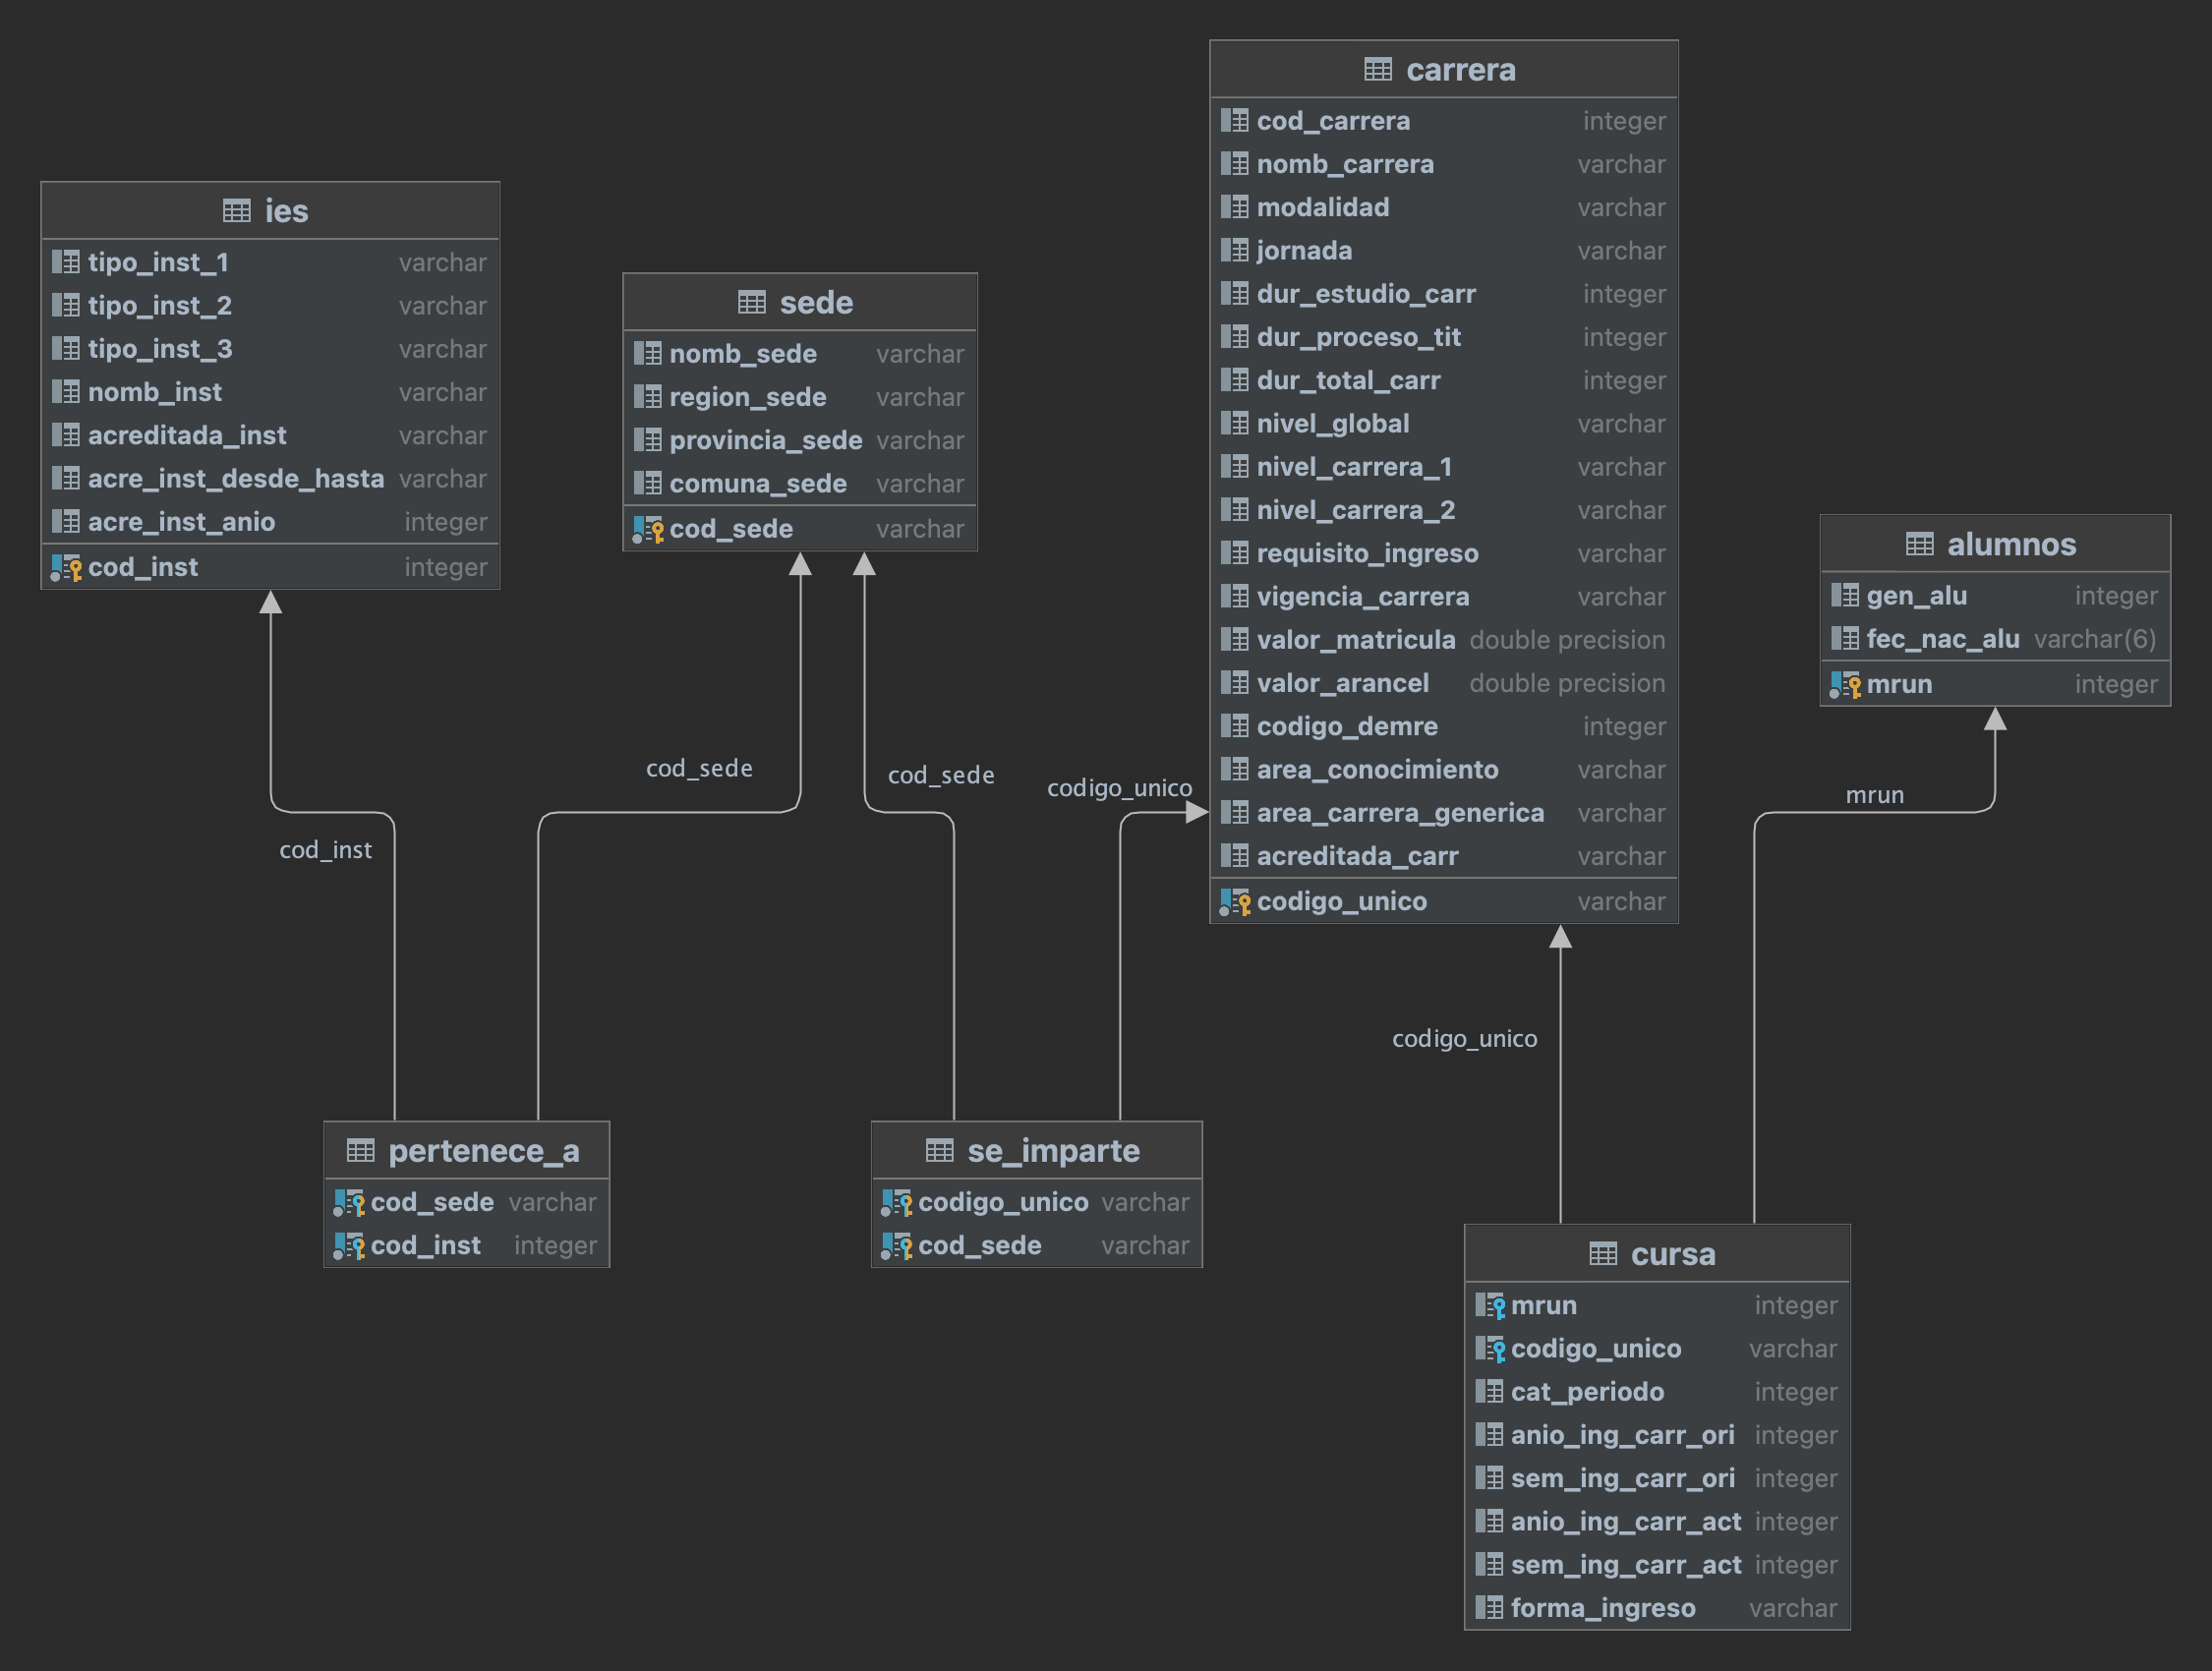

https://datosabiertos.mineduc.cl/matricula-en-educacion-superior/

## Consultas de SQL en R.

### Comenzaremos con preguntas muy simples, para introducir la sintaxis de `SQL`. 

Comenzaremos con preguntas muy simples, para introducir la sintaxis de `SQL` en PSQL.
Primero, vamos a ocupar `SELECT`, `FROM` y `LIMIT`.
- `SELECT`: selecciona las columnas que queremos ver.
- `FROM`: selecciona la tabla de la cual queremos ver las columnas.
- `WHERE`: selecciona las filas que queremos ver, según una condición.
- `LIMIT`: selecciona el número de filas que queremos ver, parecido a `head()` y `tail()` en R.

### <font color='red'> 1.  Seleccionar el nombre (`nomb_inst`) y código (`cod_inst`) de todas las Instituciones de Educación Superior (IES) de la tabla "`ies`". Considerar solo 5 filas. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 2. Seleccionar el código (`cod_inst`) de la PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 3.  Seleccionar el nombre de todas las sedes (`nomb_sed`) de la PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 4. Seleccionar todos los programas (`codigo_unico` y `nomb_carrera`) que se imparten en la sede de 'CAMPUS SAN JOAQUIN' de la 'PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE'. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### Ahora, vamos a utilizar `GROUP BY`, `HAVING`, `ORDER BY`, `COUNT`, `SUM`, `AVG`, `MIN`, `MAX`, etc.

- `GROUP BY`: agrupa las filas según una columna.
- `HAVING`: selecciona las filas que queremos ver, según una condición, **pero después de agrupar**.
- `ORDER BY`: ordena las filas según una columna.
- `COUNT`: cuenta el número de filas.
- `SUM`: suma los valores de una columna.
- `AVG`: calcula el promedio de los valores de una columna.
- `MIN`: calcula el mínimo de los valores de una columna.
- `MAX`: calcula el máximo de los valores de una columna.

### <font color='red'> 5. Seleccionar el nombre de todas las IES, ordenadas alfabéticamente. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 6. Número de sedes que tiene cada IES, ordenadas de mayor a menor por número de sedes. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 7.  Entregar el identificador (`mrun`) de los estudiantes que tienen más de 5 programas de estudio distintos inscritos. Ordenar de mayor a menor por número de programas distintos. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 8. Número de estudiantes matriculados por región. </font>

In [ ]:
# REALIZAR EN CLASES
query <- ""
dbGetQuery(con, query)

### <font color='red'> 9. Entrege el porcentaje del número de estudiantes por región. </font>

HINT: La consulta "`SELECT COUNT(*) FROM alumnos;`" en SQL devuelve el número de filas o registros que existen en la tabla "alumnos".

In [ ]:
# REALIZAR EN CLASES
query <- "
"
dbGetQuery(con, query)

## SQL: Consultas anidadas 

Las consultas anidadas en SQL se refieren a la **inclusión de una consulta dentro de otra consulta**. Esto implica que una consulta puede utilizar los resultados de otra consulta como entrada para realizar operaciones adicionales.

La consulta anidada se coloca dentro de la cláusula WHERE o en la cláusula FROM de una consulta principal. La consulta anidada se ejecuta primero y luego su resultado se utiliza en la consulta principal para realizar más operaciones.

Ejemplo:

`SELECT` columna1

`FROM` tabla1

`WHERE` columna2 IN **(`SELECT` columna3 `FROM` tabla2 `WHERE` condición)**


**También es posible con la siguiente sintaxis:**

`WITH` tabla2 AS (

`SELECT` columna1
  
`FROM` tabla1
  
`WHERE` condicion1 )
      
`SELECT` columna2

`FROM` tabla2

### <font color='red'> 10. Cantidad de estudiantes de postgrado que pertenecen a cada institución. </font>

In [ ]:
# REALIZAR EN CLASES

# [1] sacar el número de estudiantes por carrera 
query <- ""
dbGetQuery(con, query)

In [ ]:
# Con [1] podemos crear una vista, que es una tabla virtual que se crea a partir de una consulta.
query <- ""
dbGetQuery(con, query)

## ACTIVIDAD 1 (30 - 45 min)

### Responder las siguientes preguntas. Pueden trabajar en grupos. 
### <font color='red'> 1. Determina los 10 programas de mayor duración, considerando solo instituciones acreditadas. Entregar el nombre del programa, el código y la duración.</font>

### <font color='red'> 2. Encontrar los 10 programas con más estudiantes matriculados de pregrado (nivel_global = 'Pregrado'). Entregar el nombre de la carrera, el código, la cantidad de estudiantes y la institución a la que pertenece. </font>

### <font color='red'> 3. Todos los programas (carreras) de modalidad presencial (modalidad = 'Presencial') que imparte la Universidad de Chile (nomb_inst = 'UNIVERSIDAD DE CHILE'). </font>

### <font color='red'> 4. Porcentaje de hombres y mujeres matriculados en Postgrado (nivel_global = 'Postgrado') en Chile. </font>

### <font color='red'> 5. Porcentaje de estudiantes matriculados según area de conocimiento (area_conocimiento) en Chile. </font>

### <font color='red'> 6. Las 10 carreras/programas de pregrado con el valor del arancel más alto. Entregar el nombre del programa, el valor del arancel y la institución a la que pertenece. </font>